<a href="https://colab.research.google.com/github/zergswim/statistics/blob/master/Maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mu: 1.0 std: 1.0 -log-likelihood: 4258.928816831971
mu: 1.0000000149011612 std: 1.0 -log-likelihood: 4258.928803547748
mu: 1.0 std: 1.0000000149011612 -log-likelihood: 4258.92869413477
mu: 1.108715696507405 std: 2.0041319123167582 -log-likelihood: 1174.8997632762125
mu: 1.1087157114085662 std: 2.0041319123167582 -log-likelihood: 1174.8997600091693
mu: 1.108715696507405 std: 2.0041319272179194 -log-likelihood: 1174.89974894877
mu: 48.52543925595356 std: -2.3289613077612508 -log-likelihood: nan
mu: 48.52543927085472 std: -2.3289613077612508 -log-likelihood: nan
mu: 48.52543925595356 std: -2.3289612928600896 -log-likelihood: nan
mu: 1.108715696507405 std: 2.0041319123167582 -log-likelihood: 1174.8997632762125
mu: 1.1087157114085662 std: 2.0041319123167582 -log-likelihood: 1174.8997600091693
mu: 1.108715696507405 std: 2.0041319272179194 -log-likelihood: 1174.89974894877
mu: 48.52543925595356 std: -2.3289613077612508 -log-likelihood: nan
mu: 24.817077476230484 std: -0.16241469772224626 -log

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


mu: 9.846927882213874 std: 1.5429853568455338 -log-likelihood: 216.5416648825963
mu: 9.846927897115036 std: 1.5429853568455338 -log-likelihood: 216.54166484005913
mu: 9.846927882213874 std: 1.542985371746695 -log-likelihood: 216.5416642785112
mu: 9.893972517210251 std: 1.7125671495562351 -log-likelihood: 211.59855915116395
mu: 9.893972532111412 std: 1.7125671495562351 -log-likelihood: 211.59855914053597
mu: 9.893972517210251 std: 1.7125671644573963 -log-likelihood: 211.59855887437683
mu: 9.918307191380372 std: 1.8551330932644148 -log-likelihood: 209.84831203069805
mu: 9.918307206281533 std: 1.8551330932644148 -log-likelihood: 209.84831203217723
mu: 9.918307191380372 std: 1.855133108165576 -log-likelihood: 209.84831193175805
mu: 9.92409507636343 std: 1.9338490471907626 -log-likelihood: 209.52611534547148
mu: 9.924095091264592 std: 1.9338490471907626 -log-likelihood: 209.52611534913896
mu: 9.92409507636343 std: 1.9338490620919238 -log-likelihood: 209.52611531956538
mu: 9.921976523381241 

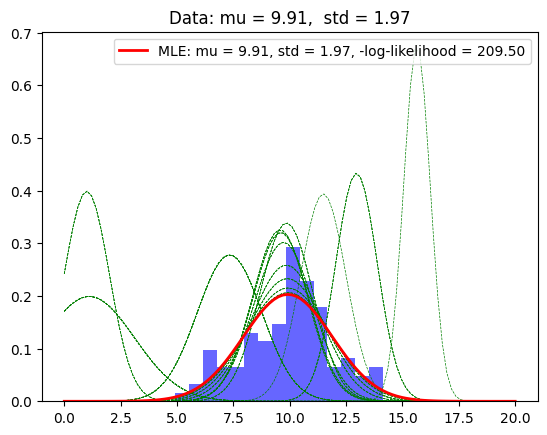

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# 가상의 데이터 생성: 평균이 10, 표준편차가 2인 정규분포에서 100개의 랜덤 데이터 포인트
# np.random.seed(42)
data = np.random.normal(10, 2, 100)
mu_org = np.mean(data)
std_org = np.std(data)

# 음의 로그 우도 함수 정의
def neg_log_likelihood(params, data):
    mu, std = params[0], params[1]

    print("mu:", mu, "std:", std, "-log-likelihood:", -np.sum(norm.logpdf(data, mu, std)))
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'g', linewidth=0.5, linestyle='dashed')

    # 표준편차가 양수인지 확인
    if std <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, mu, std))

# 데이터와 결과 시각화
fig, ax = plt.subplots()

# 원본 데이터의 히스토그램
ax.hist(data, bins=15, density=True, alpha=0.6, color='b')

# MLE를 사용하여 추정된 정규분포
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
x = np.linspace(0, 20, 100)
title = "Data: mu = %.2f,  std = %.2f" % (mu_org, std_org)
ax.set_title(title)

# 최적화 시작점
initial_guess = [1, 1]

# 최적화 수행
result = minimize(neg_log_likelihood, initial_guess, args=(data,))
mu_mle, std_mle = result.x

p = norm.pdf(x, mu_mle, std_mle)
ax.plot(x, p, 'r', linewidth=2, label=f'MLE: mu = {mu_mle:.2f}, std = {std_mle:.2f}, -log-likelihood = {result.fun:.2f}')

plt.legend()
plt.show()
